Utilizando el dataset de señas de manos, crear una red neuronal con caracteristicas similares a las vistas en clase y entrenarla hasta obtener un accuracy de, como minimo, 85% evitando sobreentrenamiento. Aplicar las técnicas de data augmentation que consideren necesarias.

---
El dataset es un conjunto de imagenes de una mano realizando figuras de numeros del 0 al 5. El objetivo es clasificar a que digito corresponde cada imagen.

<img src="https://drive.google.com/uc?export=view&id=1Tm9arSkvypYpXzANQo4C2DtMWzkjA4hO" style="width:800px;height:300px;">

Para cargar en memoria el dataset suministrado pueden utilizar la siguiente función:


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/VPC2/manos/train/train_signs.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('/content/drive/MyDrive/VPC2/manos/test/test_signs.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
  #  train_y = train_y.reshape((1, train_y.shape[0]))
  #  test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_x, train_y, test_x, test_y, classes = load_dataset()

In [5]:
test_y.shape

(120,)

El conjunto de entrenamiento tiene 1080 imágenes
El conjunto de testeo tiene 120 imágenes
Las imágenes son de dimensiones: (64, 64, 3)
Label de la imágen 0: 5
Label de la imágen 1: 0
Label de la imágen 2: 2
Label de la imágen 3: 5
Label de la imágen 4: 2
Label de la imágen 5: 4
Label de la imágen 6: 2
Label de la imágen 7: 1
Label de la imágen 8: 1


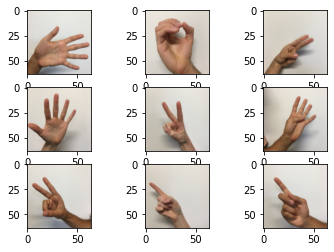

In [6]:
print("El conjunto de entrenamiento tiene {} imágenes".format(len(train_x)))
print("El conjunto de testeo tiene {} imágenes".format(len(test_x)))
print("Las imágenes son de dimensiones: {}".format(train_x[0].shape))

##### Ploteo algunas imagenes del dataset y sus etiquetas
for i in range(9):
  plt.subplot(331 + i)
  plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
  print("Label de la imágen {}: {}".format(i, train_y[i]))

plt.show()

In [7]:
train_y = tf.one_hot(train_y, 6)
test_y = tf.one_hot(test_y, 6)

In [67]:
test_x.shape

(120, 64, 64, 3)

In [9]:
train_x = train_x / 255.0
test_x = test_x / 255.0

valid_x = train_x[:100]
valid_y = train_y[:100]

In [63]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

Primer compile: Optimizer RMS Prop con Learning rate 0.1,función de pérdidas categorical cross entropy.

In [28]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model.fit(x=train_x, y=train_y, batch_size=16, epochs=100, validation_split=0.9)

Epoch 1/100
7/7 [==============================] - 2s 145ms/step - loss: 308104320.0000 - categorical_accuracy: 0.1869 - val_loss: 23804.9316 - val_categorical_accuracy: 0.1644
Epoch 2/100
7/7 [==============================] - 0s 78ms/step - loss: 13938.3506 - categorical_accuracy: 0.1589 - val_loss: 1.8944 - val_categorical_accuracy: 0.1665
Epoch 3/100
7/7 [==============================] - 0s 79ms/step - loss: 1.8449 - categorical_accuracy: 0.1682 - val_loss: 1.8367 - val_categorical_accuracy: 0.1655
Epoch 4/100
7/7 [==============================] - 0s 80ms/step - loss: 1.8028 - categorical_accuracy: 0.1869 - val_loss: 1.8158 - val_categorical_accuracy: 0.1644
Epoch 5/100
7/7 [==============================] - 1s 123ms/step - loss: 1.8142 - categorical_accuracy: 0.1682 - val_loss: 1.8115 - val_categorical_accuracy: 0.1644
Epoch 6/100
7/7 [==============================] - 0s 78ms/step - loss: 1.8377 - categorical_accuracy: 0.1589 - val_loss: 1.7988 - val_categorical_accuracy: 0.165

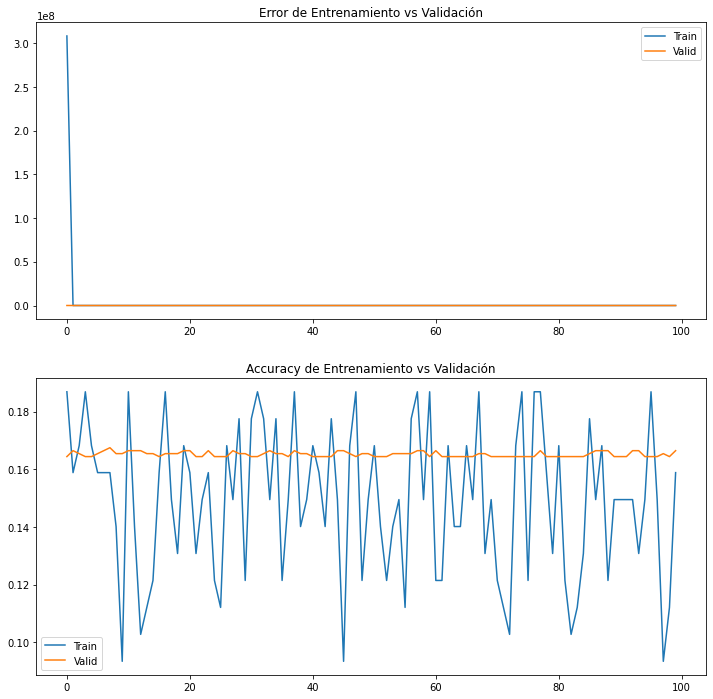

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(history.history['categorical_accuracy']) 
axs[1].plot(history.history['val_categorical_accuracy']) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model.fit(x=train_x, y=train_y, batch_size=16, epochs=100, validation_split=0.9)

Epoch 1/100
7/7 [==============================] - 1s 129ms/step - loss: 1.8014 - categorical_accuracy: 0.1589 - val_loss: 1.7918 - val_categorical_accuracy: 0.1665
Epoch 2/100
7/7 [==============================] - 1s 124ms/step - loss: 1.7920 - categorical_accuracy: 0.1682 - val_loss: 1.7914 - val_categorical_accuracy: 0.1696
Epoch 3/100
7/7 [==============================] - 1s 83ms/step - loss: 1.7893 - categorical_accuracy: 0.1495 - val_loss: 1.7911 - val_categorical_accuracy: 0.1778
Epoch 4/100
7/7 [==============================] - 0s 80ms/step - loss: 1.7874 - categorical_accuracy: 0.1682 - val_loss: 1.7891 - val_categorical_accuracy: 0.1634
Epoch 5/100
7/7 [==============================] - 1s 123ms/step - loss: 1.7879 - categorical_accuracy: 0.1682 - val_loss: 1.7896 - val_categorical_accuracy: 0.1778
Epoch 6/100
7/7 [==============================] - 1s 82ms/step - loss: 1.7842 - categorical_accuracy: 0.1963 - val_loss: 1.7894 - val_categorical_accuracy: 0.1737
Epoch 7/100
7

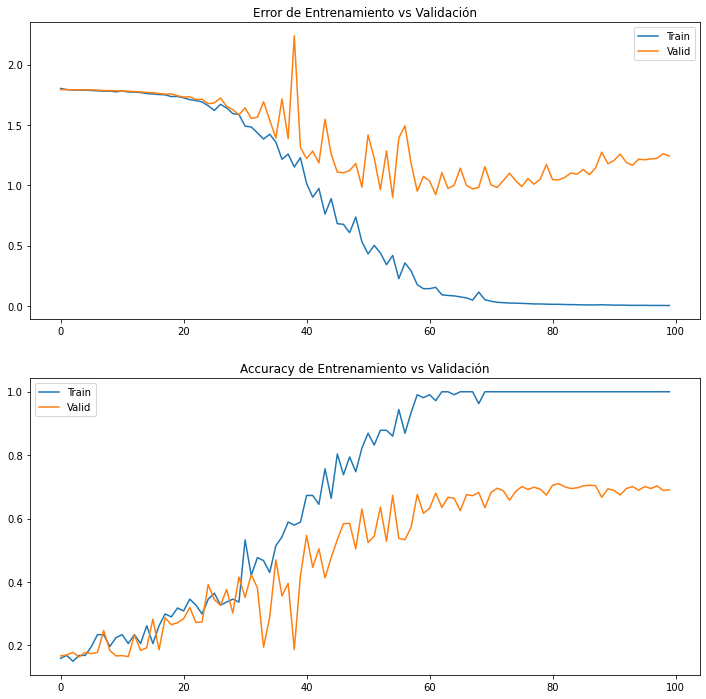

In [65]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(history.history['categorical_accuracy']) 
axs[1].plot(history.history['val_categorical_accuracy']) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model.fit(x=train_x, y=train_y, batch_size=16, epochs=100, validation_split=0.9)

Epoch 1/100
7/7 [==============================] - 2s 172ms/step - loss: 300075.2812 - categorical_accuracy: 0.1495 - val_loss: 41922.1055 - val_categorical_accuracy: 0.1644
Epoch 2/100
7/7 [==============================] - 1s 123ms/step - loss: 12949.6230 - categorical_accuracy: 0.1402 - val_loss: 463.7740 - val_categorical_accuracy: 0.1665
Epoch 3/100
7/7 [==============================] - 1s 124ms/step - loss: 103.6345 - categorical_accuracy: 0.1776 - val_loss: 149.8117 - val_categorical_accuracy: 0.1696
Epoch 4/100
7/7 [==============================] - 1s 124ms/step - loss: 21.9552 - categorical_accuracy: 0.1869 - val_loss: 1.8101 - val_categorical_accuracy: 0.1665
Epoch 5/100
7/7 [==============================] - 1s 83ms/step - loss: 1.7946 - categorical_accuracy: 0.1869 - val_loss: 1.8086 - val_categorical_accuracy: 0.1644
Epoch 6/100
7/7 [==============================] - 1s 84ms/step - loss: 1.7929 - categorical_accuracy: 0.1869 - val_loss: 1.8080 - val_categorical_accuracy:

In [61]:
# Limpio la sesion y elimino el objeto de modelo para evitar seguir entrenando sobre el mismo.
from tensorflow.keras import backend as K 
K.clear_session()
del model

In [68]:
results = model.evaluate(test_x, test_y)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

4/4 [==============================] - 0s 29ms/step - loss: 1.4574 - categorical_accuracy: 0.6667
El modelo logro un error de 1.4574382305145264 y una accuracy de 0.6666666865348816


El mejor modelo es el que usa de optimizador Adadelta, alcanzando una accuracy de validación de 0.7 pero con tendencia a hacer overfitting.

# Data Augmentation

In [51]:
from imgaug import augmenters as iaa

aug1 = iaa.GaussianBlur(sigma=(0, 2.0))
aug2 = iaa.AdditiveGaussianNoise(scale=0.02 * 255)

# Defino una función que aplica las transformaciones sobre una imágen
def additional_augmentation(image):
    image = aug1.augment_image(image)
    image = aug2.augment_image(image)
    return image

In [69]:
aug_train_datagen = ImageDataGenerator(width_shift_range=0.3,
                                       height_shift_range=0.3,
                                       brightness_range=[0.6, 1.2],
                                       zoom_range=[0.5, 1.5],
                                       horizontal_flip=True,
                                       rescale=1./255,
                                       preprocessing_function=additional_augmentation)

aug_train_generator = aug_train_datagen.flow(train_x, train_y, batch_size=16)

aug_valid_datagen = ImageDataGenerator(width_shift_range=0.3,
                                       height_shift_range=0.3,
                                       brightness_range=[0.6, 1.2],
                                       zoom_range=[0.5, 1.5],
                                       horizontal_flip=True,
                                       rescale=1./255,
                                       preprocessing_function=additional_augmentation)

aug_valid_generator = aug_valid_datagen.flow(valid_x, valid_y, batch_size=8)

aug_test_datagen = ImageDataGenerator(width_shift_range=0.3,
                                       height_shift_range=0.3,
                                       brightness_range=[0.6, 1.2],
                                       zoom_range=[0.5, 1.5],
                                       horizontal_flip=True,
                                       rescale=1./255,
                                       preprocessing_function=additional_augmentation)

aug_test_generator = aug_valid_datagen.flow(test_x, test_y, batch_size=8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


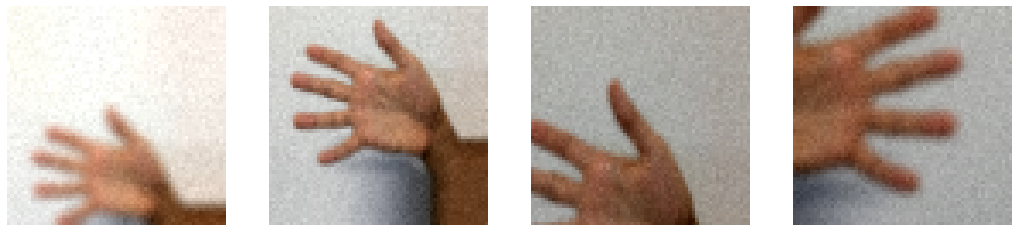

In [53]:
image = train_x[0]
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
test_train_generator = aug_train_datagen.flow(image)

fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
for row in rows:
    row.imshow(test_train_generator.next()[0])
    row.axis('off')
plt.show()

In [57]:
aug_model = tf.keras.Sequential()

aug_model.add(tf.keras.layers.Input(shape=(64, 64, 3)))
aug_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
aug_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
aug_model.add(tf.keras.layers.Flatten())
aug_model.add(tf.keras.layers.Dense(units=512, activation='relu'))
aug_model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [59]:
aug_model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

aug_history = aug_model.fit(aug_train_generator, epochs=100, validation_data=aug_valid_generator)

Epoch 1/100
68/68 [==============================] - 7s 90ms/step - loss: 1.7922 - categorical_accuracy: 0.1778 - val_loss: 1.7877 - val_categorical_accuracy: 0.2583
Epoch 2/100
68/68 [==============================] - 6s 86ms/step - loss: 1.7878 - categorical_accuracy: 0.1787 - val_loss: 1.7819 - val_categorical_accuracy: 0.2417
Epoch 3/100
68/68 [==============================] - 6s 86ms/step - loss: 1.7842 - categorical_accuracy: 0.1991 - val_loss: 1.7845 - val_categorical_accuracy: 0.1667
Epoch 4/100
68/68 [==============================] - 6s 85ms/step - loss: 1.7809 - categorical_accuracy: 0.2037 - val_loss: 1.7769 - val_categorical_accuracy: 0.2333
Epoch 5/100
68/68 [==============================] - 6s 86ms/step - loss: 1.7770 - categorical_accuracy: 0.2157 - val_loss: 1.7671 - val_categorical_accuracy: 0.2333
Epoch 6/100
68/68 [==============================] - 6s 86ms/step - loss: 1.7634 - categorical_accuracy: 0.2250 - val_loss: 1.8459 - val_categorical_accuracy: 0.1667
Epoc

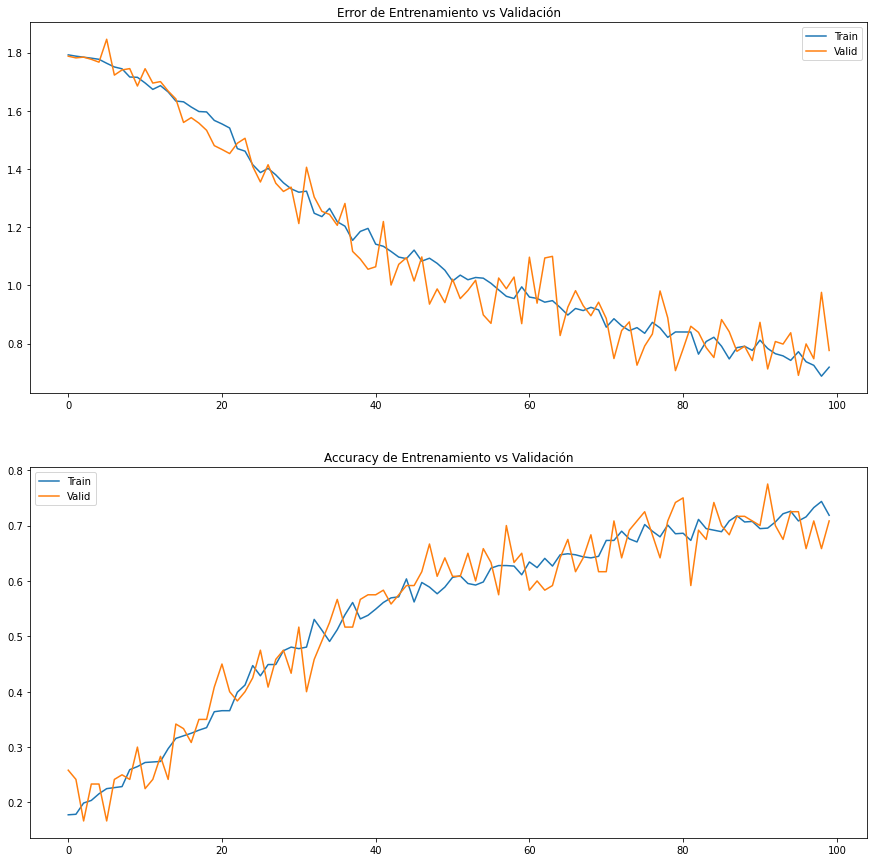

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(aug_history.history['loss']) 
axs[0].plot(aug_history.history['val_loss']) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(aug_history.history['categorical_accuracy']) 
axs[1].plot(aug_history.history['val_categorical_accuracy']) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [56]:
# Limpio la sesion y elimino el objeto de modelo para evitar seguir entrenando sobre el mismo.
from tensorflow.keras import backend as K 
K.clear_session()
del aug_model

In [71]:
results = aug_model.evaluate(aug_test_generator)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

15/15 [==============================] - 1s 40ms/step - loss: 0.7747 - categorical_accuracy: 0.7167
El modelo logro un error de 0.7746641039848328 y una accuracy de 0.7166666388511658


Accuracy mejora.